In [3]:
import pickle

path = "/home/p84400019/projects/consciousness-llms/Synergy_Redundancy_LLMs/data/google/gemma-3/1B/base/3-Synergy_Redundancy_Matrices/average_prompts/transfer_entropy_x_t_->_y_t+1Normalized.pkl"

with open(path, "rb") as f:
    data = pickle.load(f)

# Optional: inspect type or content
print(type(data))
print(data.shape)
print(data)
print(data[0, 1])


<class 'numpy.ndarray'>
(104, 104)
[[0.         0.24456998 0.08434787 ... 0.09471739 0.09844805 0.18646125]
 [0.46363997 0.         0.27282657 ... 0.11542113 0.06891964 0.1396609 ]
 [0.7648097  0.29107371 0.         ... 0.09230065 0.0852106  0.11667725]
 ...
 [0.20824144 0.21461348 0.2216014  ... 0.         0.08656675 0.0575675 ]
 [0.11227911 0.14064514 0.07532324 ... 0.08329077 0.         0.05615961]
 [0.19328309 0.17834976 0.15451056 ... 0.07066971 0.08040395 0.        ]]
0.24456998022387932


In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def plot_upper_triangle_zeroed(pickle_path, cmap='viridis', figsize=(8,8), vmin=None, vmax=None):
    """
    Loads a square matrix from `pickle_path`, zeroes out the lower-left triangle
    (including the diagonal), and displays a color plot of the result.

    Parameters
    ----------
    pickle_path : str
        Filesystem path to a pickle file containing a square 2D numpy array.
    cmap : str, optional
        Matplotlib colormap to use for the heatmap (default 'viridis').
    figsize : tuple, optional
        Figure size in inches (width, height), default (8,8).
    vmin, vmax : float, optional
        Color scale limits; if None, determined from data.
    """
    # 1. Load the matrix
    with open(pickle_path, "rb") as f:
        M = pickle.load(f)
    
    # Sanity check
    if not (isinstance(M, np.ndarray) and M.ndim == 2 and M.shape[0] == M.shape[1]):
        raise ValueError(f"Expected a square 2D numpy array, got shape {getattr(M, 'shape', None)}")

    # 2. Zero out lower-left triangle including diagonal
    #    np.tril_indices_from returns the row,col indices for the lower triangle.
    tri_rows, tri_cols = np.tril_indices_from(M, k=0)
    M[tri_rows, tri_cols] = 0.0

    # 3. Plot
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.imshow(M, cmap=cmap, vmin=vmin, vmax=vmax, origin='upper', aspect='equal')
    ax.set_title("Transfer Entropy")
    ax.set_xlabel("Target Attention Head")
    ax.set_ylabel("Source Attention Head")
    plt.colorbar(cax, ax=ax, label="Normalized TE")

    plt.tight_layout()
    plt.show()



Processing /home/p84400019/projects/consciousness-llms/Synergy_Redundancy_LLMs/data/google/gemma-3/1B/base/3-Synergy_Redundancy_Matrices/average_prompts/transfer_entropy_x_t_->_y_t+1Normalized.pkl


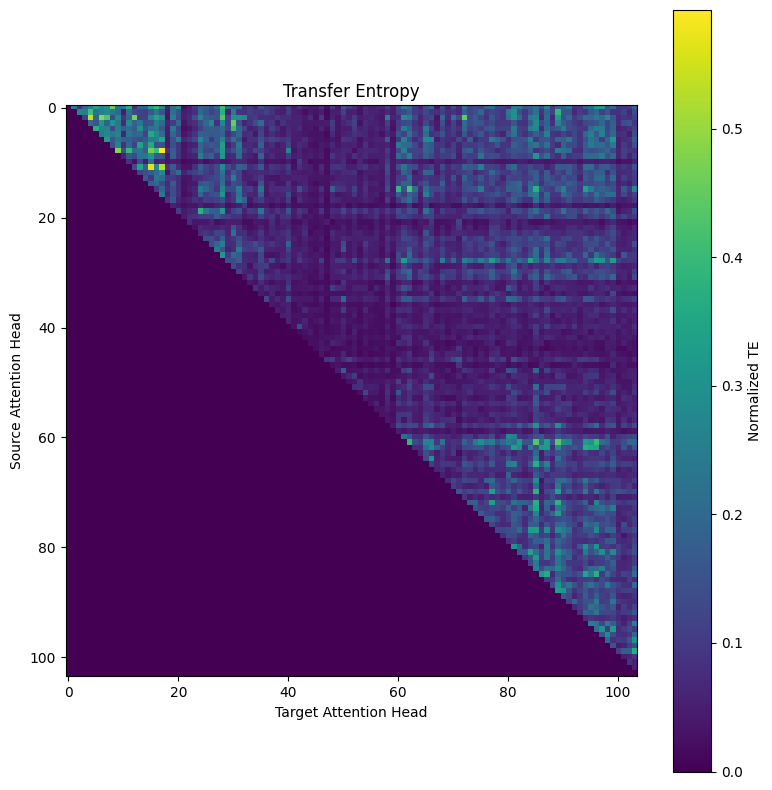

Processing /home/p84400019/projects/consciousness-llms/Synergy_Redundancy_LLMs/data/google/gemma-3/1B/base/3-Synergy_Redundancy_Matrices/average_prompts/transfer_entropy_x_t_->_y_t+1Unnormalized.pkl


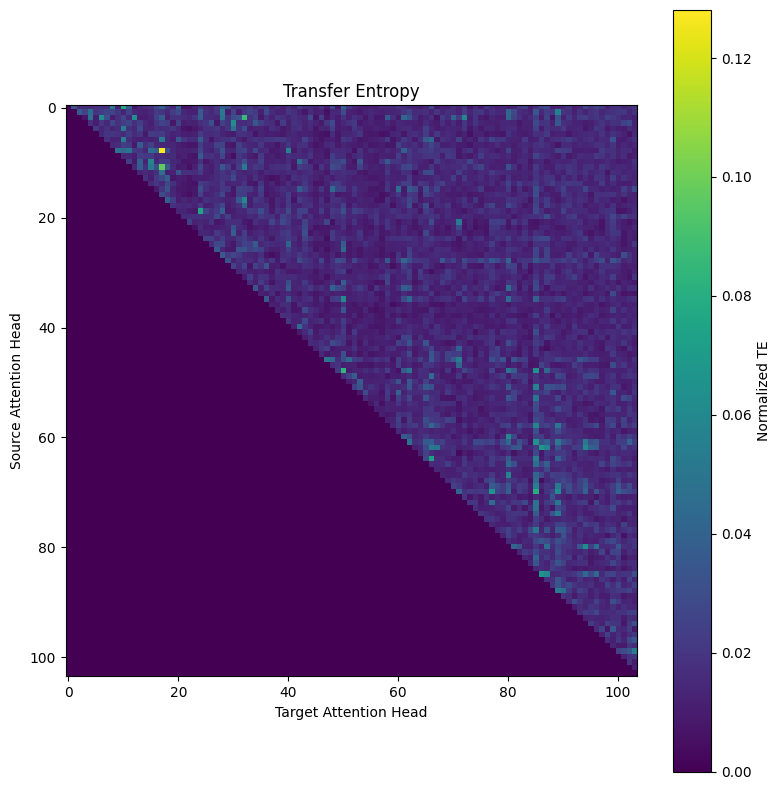

Processing /home/p84400019/projects/consciousness-llms/Synergy_Redundancy_LLMs/data/google/gemma-3/4B/base/3-Synergy_Redundancy_Matrices/average_prompts/transfer_entropy_x_t_->_y_t+1Normalized.pkl


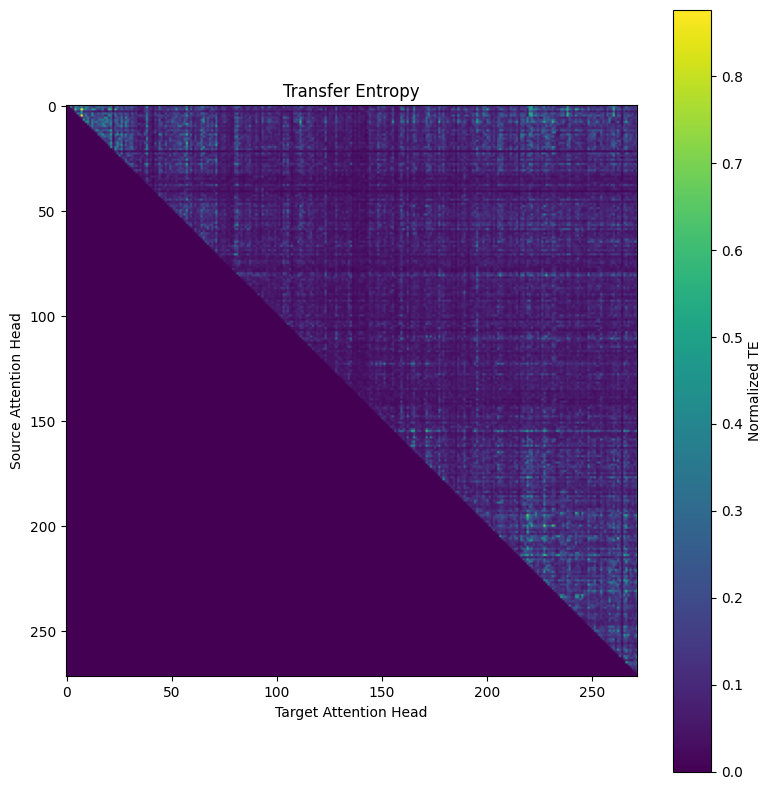

Processing /home/p84400019/projects/consciousness-llms/Synergy_Redundancy_LLMs/data/google/gemma-3/4B/base/3-Synergy_Redundancy_Matrices/average_prompts/transfer_entropy_x_t_->_y_t+1Unnormalized.pkl


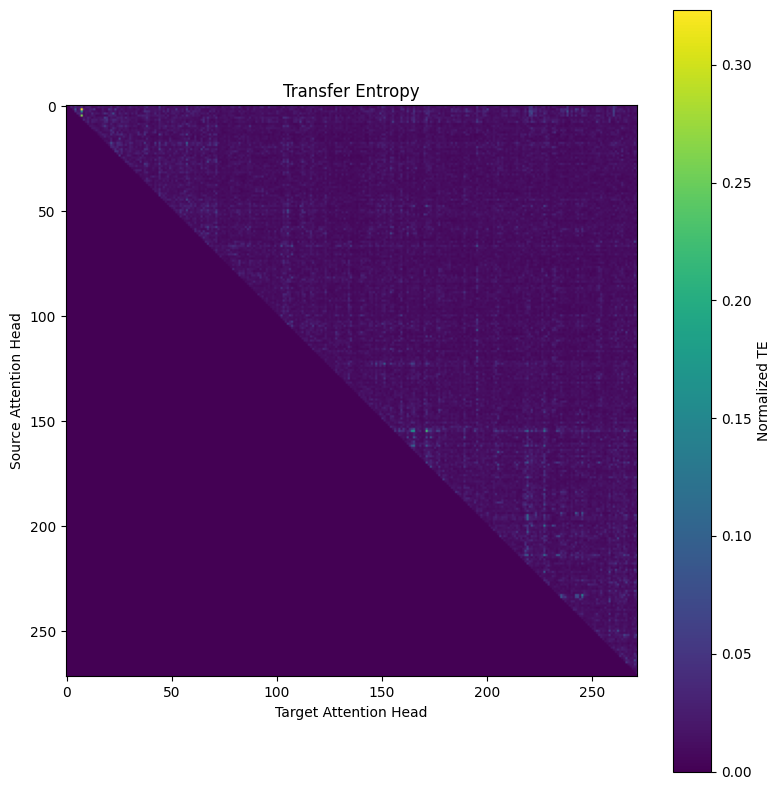

In [ ]:
if __name__ == "__main__":
    # Example usage:
    paths = [
        "/home/p84400019/projects/consciousness-llms/Synergy_Redundancy_LLMs/data/google/gemma-3/1B/base/3-Synergy_Redundancy_Matrices/average_prompts/transfer_entropy_x_t_->_y_t+1Normalized.pkl",
        "/home/p84400019/projects/consciousness-llms/Synergy_Redundancy_LLMs/data/google/gemma-3/1B/base/3-Synergy_Redundancy_Matrices/average_prompts/transfer_entropy_x_t_->_y_t+1Unnormalized.pkl",
        "/home/p84400019/projects/consciousness-llms/Synergy_Redundancy_LLMs/data/google/gemma-3/4B/base/3-Synergy_Redundancy_Matrices/average_prompts/transfer_entropy_x_t_->_y_t+1Normalized.pkl",
        "/home/p84400019/projects/consciousness-llms/Synergy_Redundancy_LLMs/data/google/gemma-3/4B/base/3-Synergy_Redundancy_Matrices/average_prompts/transfer_entropy_x_t_->_y_t+1Unnormalized.pkl",
    ]
    for path in paths:
        print(f"Processing {path}")
        plot_upper_triangle_zeroed(path)